In [2]:
import numpy as np
import numpy.typing as npt
from typing import Tuple
import matplotlib.pyplot as plt

plt.style.use("seaborn")

# Homework 09 - Eigenvalue equations

#### Excercise 1
 Write a program that uses the [QR algorithm][1] to find the eigenvlues of a $4\times4$ matrix $A$, with random elements but known eignevalues. You can create such a matrix by $A=SDS^{-1}$, where $D$ is a diagonal matrix with the expected eigenvalues on the diagonal, and $S$ is any random matrix of the same size.

Stop the QR algorithm iteration process when the element in the lower left corner become extremely small, $|A_{3,0}| <10^{-300}$ Note that it is unlikely the upper triangluar part of the matrix will be zero. 

- Print out the oringal and finished matrix $A$
- Verify the diagonal of $A$ has the same elements that are found with [`numpy.linalg.eig`][2]. Use  [`numpy.diagonal`][3] to view only the diagonal of $A$.



[1]: https://en.wikipedia.org/wiki/QR_algorithm
[2]: https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.linalg.eig.html
[3]: https://numpy.org/doc/stable/reference/generated/numpy.diagonal.html

<div class="alert alert-block alert-info">
<b>Tip:</b> Note that the results may not come out in the same order, but you should expect that the eigenvectors should match their respective eigenvalues.
</div>

In [3]:
def QR_Algorithm(matrix: npt.ArrayLike, epsilon: float = 1e-300) -> Tuple[npt.ArrayLike, npt.ArrayLike]:
    if not isinstance(matrix, np.ndarray):
        raise TypeError("Matrix must be a numpy array")
    if not isinstance(epsilon, float):
        raise TypeError("epsilon must be a float")
    if epsilon <= 0:
        raise ValueError("epsilon must be a positive number")
    if matrix.shape[0] != matrix.shape[1]:
        raise ValueError("Matrix must be a square matrix")
    
    print("Initial A:\n", matrix)
    
    A = matrix
    Q, R = np.linalg.qr(A)
    A_next = R @ Q
    # eigen_vectors = Q
    
    below_diagonal = np.tril(A, -1)
    sum_below_diagonal = np.sum(abs(below_diagonal))
    
    # I am checking that the sum of all of the elements below the diagonal is less than epsilon instead
    while sum_below_diagonal > epsilon:
        A = A_next
        Q, R = np.linalg.qr(A)
        A_next = R @ Q
        below_diagonal = np.tril(A, -1)
        sum_below_diagonal = np.sum(abs(below_diagonal))
        # eigen_vectors = eigen_vectors @ Q
    eigen_values = np.diag(A)
        
    print("Final A:\n", A)
    
    # eigen_vectors = eigen_vectors / np.linalg.norm(eigen_vectors, axis=0)
    
    return eigen_values

def main(n: int = 4) -> None:
    S = np.random.rand(n, n)
    # S = np.array([[1, 2], [4, 5]])
    Sinv = np.linalg.inv(S)
    D = np.diag(np.random.rand(n))
    A = S @ D @ Sinv

    # print("S:\n", S)
    # print("Sinv:\n", Sinv)
    print("D:\n", D)
    # print("A:\n", A)

    eigen_values= QR_Algorithm(A)
    print("eigen_values:\n", eigen_values)
    print("eigen_values from NumPy:\n", np.linalg.eigvals(A))
    
    if np.allclose(np.sort(np.linalg.eigvals(A)), np.sort(eigen_values)):
        print("The eigenvalues are correct")
    
if __name__ == "__main__":
    main()

D:
 [[0.06081902 0.         0.         0.        ]
 [0.         0.83838185 0.         0.        ]
 [0.         0.         0.96409572 0.        ]
 [0.         0.         0.         0.06401465]]
Initial A:
 [[ 0.31797517  1.06913777 -1.29323757  0.31125313]
 [-0.189521    1.41883505 -0.89188468  0.26243566]
 [-0.52163142  0.88394726  0.05957641  0.07159991]
 [-0.60612019  0.96863638  0.04883674  0.13092461]]
Final A:
 [[ 9.64095724e-001  3.23410064e-001  1.79398012e+000  1.57036973e+000]
 [-3.45845952e-323  8.38381853e-001 -7.99415155e-001  4.95885763e-001]
 [ 0.00000000e+000  0.00000000e+000  6.40146504e-002 -1.15033563e-003]
 [ 0.00000000e+000  0.00000000e+000  9.66997832e-301  6.08190210e-002]]
eigen_values:
 [0.96409572 0.83838185 0.06401465 0.06081902]
eigen_values from NumPy:
 [0.96409572 0.83838185 0.06401465 0.06081902]
The eigenvalues are correct


<font color="blue">Answer:</font>

#### Excercise 2

The `scipy` functions for solving eigenvalue problems are `scipy.linalg.eig` and `scipy.linalg.eigh`.

What is the difference between these functions? Provide a definition for all terms.

<font color="blue">Answer: <font>

In [4]:
from scipy.linalg import eig, eigh

print("scipy.linalg.eig documentation")
print(eig.__doc__)

print("scipy.linalg.eigh documentation")
print(eigh.__doc__)

scipy.linalg.eig documentation

    Solve an ordinary or generalized eigenvalue problem of a square matrix.

    Find eigenvalues w and right or left eigenvectors of a general matrix::

        a   vr[:,i] = w[i]        b   vr[:,i]
        a.H vl[:,i] = w[i].conj() b.H vl[:,i]

    where ``.H`` is the Hermitian conjugation.

    Parameters
    ----------
    a : (M, M) array_like
        A complex or real matrix whose eigenvalues and eigenvectors
        will be computed.
    b : (M, M) array_like, optional
        Right-hand side matrix in a generalized eigenvalue problem.
        Default is None, identity matrix is assumed.
    left : bool, optional
        Whether to calculate and return left eigenvectors.  Default is False.
    right : bool, optional
        Whether to calculate and return right eigenvectors.  Default is True.
    overwrite_a : bool, optional
        Whether to overwrite `a`; may improve performance.  Default is False.
    overwrite_b : bool, optional
        Wheth

## Answer

`scipy.linalg.eig` or `numpy.linalg.eig` solve the eigenvalue problem for general square matrices.

`scipy.linalg.eigh` or `numpy.linalg.eigh` solve the eigenvalue problem for <b>SYMMETRIC</b> matrices.

Since `eigh` is designed specifically for symmetric matrices, it uses a different algorithm which can be computer quicker.

#### Excercise 3
Use specifically the `scipy.linalg.eigh` function to find the eigenvaleus and eignevectors of the matrix
$$\begin{bmatrix}
1 & 0 \\
2 & 1
\end{bmatrix}$$
Did you get the same or different results from the lecture example 2? Is that correct? Why is that?

<font color="blue"> Answer: </font> 

In [5]:
A = np.array([[1, 0], [2, 1]])

print("A:\n", A, "\n")

l1, v1 = np.linalg.eig(A)
print("np.linalg.eig eigenvalues:\n", l1)
print("np.linalg.eig eigenvectors:\n", v1)

print("\n")

l2, v2 = np.linalg.eigh(A)
print("np.linalg.eigh eigenvalues:\n", l2)
print("np.linalg.eigh eigenvectors:\n", v2)

A:
 [[1 0]
 [2 1]] 

np.linalg.eig eigenvalues:
 [1. 1.]
np.linalg.eig eigenvectors:
 [[ 0.00000000e+00  1.11022302e-16]
 [ 1.00000000e+00 -1.00000000e+00]]


np.linalg.eigh eigenvalues:
 [-1.  3.]
np.linalg.eigh eigenvectors:
 [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


## Answer

These are the same results as from lecture for the matrix

$$\begin{bmatrix}
1 & 2 \\
2 & 1
\end{bmatrix}$$

Which is not correct as these are different matrices. The fault? We used `np.linalg.eigh` for a matrix which is not symmetric. In the documentation, NumPy specify that they do not automatically check if the matrix is symmetric. Thus, we the user, made the error by using `eigh` instead of `eig`. The correct eigenvalues can be obtained using `eig` which gives that $lambda = 1$ with degerneracy 2.

#### Excercise 4
Use and eigenproblem solver to find the eigenvalues of the matrix
$$\begin{bmatrix}
-2 & +2 & -3\\
+2 & +1 & -6\\
-1 & -2 & +0
\end{bmatrix}$$
Verify you get the eigenvalues $\lambda=-3,-3,$ and $5$. 

- Verify that the eigenvector for $\lambda=5$ is proportional to
$$
\frac{1}{\sqrt{6}}\left[
\begin{array}{}+1\\+2\\-1\end{array}
\right]
$$

The eigenvalue $-3$ corresponds to a double root. This means that the corresponding eigenvectors are degenerate, which in turn means that they are not unique. Here are two linearly independent ones:
$$
\frac{1}{\sqrt{5}}\left[
\begin{array}{}+2\\-1\\+0\end{array}
\right], \ \ 
\frac{1}{\sqrt{10}}\left[
\begin{array}{}-3\\+0\\-1\end{array}
\right]
$$
In this case it’s not clear what the `scipy.linalg.eig` solver will give for these eigenvectors, it probably won't be these.

- Try to find a relationship between *your* computed eigenvectors for the eigenvalues of $−3$ and these two linearly independent ones provided above.
    

<font color="blue">Answer: <font>

In [6]:
# Find linear combination of vectors from EIG that equal the two provided eigen vectors
# Rotation also works

A = np.array([[-2, 2, -3], [2, 1, -6], [-1, -2, 0]])

eigen_5_true = (1 / np.sqrt(6)) * np.array([1, 2, -1])
eigen_minus_3_true_1 = (1 / np.sqrt(5)) * np.array([2, -1, 0])
eigen_minus_3_true_2 = (1 / np.sqrt(10)) * np.array([-3, 0, -1])

print("eigen_5_true:\n", eigen_5_true)
print("eigen_minus_3_true_1:\n", eigen_minus_3_true_1)
print("eigen_minus_3_true_2:\n", eigen_minus_3_true_2)
print("\n")

eigen_values, eigen_vectors = np.linalg.eig(A)

print("eigen_values:\n", eigen_values)
print("eigen_vectors:\n", eigen_vectors)
print("\n")

eigen_5_index = np.argwhere(np.isclose(eigen_values, 5))[0][0]
eigen_minus_3_index = np.argwhere(np.isclose(eigen_values, -3))
eigen_5_vector = eigen_vectors[:, eigen_5_index]

scale = (1 / np.sqrt(6)) / eigen_5_vector[0]
if np.allclose(eigen_5_true, eigen_5_vector * scale):
    print("The eigenvector for the eigenvalue = 5 is correct")

eigen_vec_minus_3_1 = eigen_vectors[:, eigen_minus_3_index[0][0]]
eigen_vec_minus_3_2 = eigen_vectors[:, eigen_minus_3_index[1][0]]

B = np.array([eigen_minus_3_true_1[:2], eigen_minus_3_true_2[:2]]).T
print("B:\n", B)
b1 = eigen_vec_minus_3_1[:2]
b2 = eigen_vec_minus_3_2[:2]
print("our eigen vector 1:\n", b1)
print("our eigen vector 2:\n", b2)
print("\n")

# Should get our eigen vector = linear combination of given eigen vectors
combination1 = np.linalg.solve(B, b1)
combination2 = np.linalg.solve(B, b2)

if np.allclose(
    eigen_vec_minus_3_1, 
    combination1[0] * eigen_minus_3_true_1 + combination1[1] * eigen_minus_3_true_2
):
    print("The first linear combinarion is:")
    print(f"{combination1[0]} * {eigen_minus_3_true_1} + {combination1[1]} * {eigen_minus_3_true_2}")
    
if np.allclose(
    eigen_vec_minus_3_2, 
    combination2[0] * eigen_minus_3_true_1 + combination2[1] * eigen_minus_3_true_2
):
    print("The second linear combinarion is:")
    print(f"{combination2[0]} * {eigen_minus_3_true_1} + {combination2[1]} * {eigen_minus_3_true_2}")

eigen_5_true:
 [ 0.40824829  0.81649658 -0.40824829]
eigen_minus_3_true_1:
 [ 0.89442719 -0.4472136   0.        ]
eigen_minus_3_true_2:
 [-0.9486833   0.         -0.31622777]


eigen_values:
 [-3.  5. -3.]
eigen_vectors:
 [[-0.95257934  0.40824829  0.05155221]
 [ 0.27216553  0.81649658  0.82292764]
 [-0.13608276 -0.40824829  0.5658025 ]]


The eigenvector for the eigenvalue = 5 is correct
B:
 [[ 0.89442719 -0.9486833 ]
 [-0.4472136   0.        ]]
our eigen vector 1:
 [-0.95257934  0.27216553]
our eigen vector 2:
 [0.05155221 0.82292764]


The first linear combinarion is:
-0.6085806194501845 * [ 0.89442719 -0.4472136   0.        ] + 0.43033148291193535 * [-0.9486833   0.         -0.31622777]
The second linear combinarion is:
-1.8401221450449752 * [ 0.89442719 -0.4472136   0.        ] + -1.789224601434249 * [-0.9486833   0.         -0.31622777]


#### Excercise 5
The kinetc energy of an object rotating about the angular velocity vector $\vec{\omega}$ is $K=\frac{1}{2}\vec{\omega}\pmb{I}\vec{\omega}$, where $\pmb{I}$ is the inertia tensor. For a solid cube of mass $m$ and side $s$, whose geometric center is the at the origin of space, 
$$
\pmb{I} = \frac{Ms^2}{6}\begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{bmatrix}
$$
and it will rotate easily about any of its principle axes parallel to its sides. ($\pmb{I}$ is already diagonal!)

If we shift the point of rotation to a corner of the cube by moving the cube $\vec{a}=(-s/2, -s/2, -s/2)$, then the inertia tensor is 
$$
I'_{ij} = I_{ij}+M\left[\delta_{ij}a^2-a_ia_j\right]
$$

- Write down the new inertia tensor using $\LaTeX$ in a Markdown cell.
    
This inertia tensor is not diagonal anymore, so if you start the cube rotating about a corner, and if the axis of rotation is one of the edges of the cube, it will tumble out of control along its new principle axes of rotation. For any rotating mechanical part, it is important that it rotate about a principal axis, otherwise it will exert a torque and cause vibrations.

- Find the principle axes of rotation as the eigenvectors of $\pmb{I}'$.
- Verify that any two eigenvectors are orthogonal, and are normal.

<font color="blue">Answer: <font>

## Answer

$$
\vec{a}=(-s/2, -s/2, -s/2) \\[10pt]

\pmb{I}^{\prime}_{ij} = \pmb{I}_{ij}+M\left[\delta_{ij}a^2-a_ia_j\right] \\[10pt]

\pmb{I} = \frac{Ms^2}{6}\begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{bmatrix} \\[10pt]

\pmb{I^\prime} = \begin{bmatrix}
\frac{Ms^2}{6} & 0 & 0\\[5pt]
0 & \frac{Ms^2}{6} & 0\\[5pt]
0 & 0 & \frac{Ms^2}{6} \\[5pt]
\end{bmatrix} 
+
M \begin{bmatrix}
\frac{2s^2}{3} & -\frac{s^2}{4} & -\frac{s^2}{4}\\[5pt]
-\frac{s^2}{4} & \frac{2s^2}{3} & -\frac{s^2}{4}\\[5pt]
-\frac{s^2}{4} & -\frac{s^2}{4} & \frac{2s^2}{3} \\[5pt]
\end{bmatrix} \\[10pt]

\pmb{I^\prime} = \frac{Ms^2}{12} \begin{bmatrix}
8  & -3 & -3\\[5pt]
-3 & 8  & -3\\[5pt]
-3 & -3 & 8 \\[5pt]
\end{bmatrix}
$$

In [7]:
M = 1
s = 2

Iprime = (M*s**2)/12 * np.array(
    [
        [8, -3, -3], 
        [-3, 8, -3], 
        [-3, -3, 8]
    ]
)

eigen_values, eigen_vectors = np.linalg.eigh(Iprime)
print("eigen_values:\n", eigen_values)
print("eigen_vectors:\n", eigen_vectors)

for i in range(len(eigen_values)):
    if np.isclose(1, np.linalg.norm(eigen_vectors[:,i])):
        print(f"\nThe eigen vector {i} is normalized")
    for j in range(len(eigen_values)):
        if i < j:
            if np.isclose(0, np.dot(eigen_vectors[:,i], eigen_vectors[:,j])):
                print(f"The eigen vector {i} and {j} are orthogonal")
            else:
                print(f"The eigen vector {i} and {j} are not orthogonal")
        

eigen_values:
 [0.66666667 3.66666667 3.66666667]
eigen_vectors:
 [[-0.57735027  0.6172134  -0.53452248]
 [-0.57735027 -0.77151675 -0.26726124]
 [-0.57735027  0.15430335  0.80178373]]

The eigen vector 0 is normalized
The eigen vector 0 and 1 are orthogonal
The eigen vector 0 and 2 are orthogonal

The eigen vector 1 is normalized
The eigen vector 1 and 2 are orthogonal

The eigen vector 2 is normalized


## Answer

We see that the eigen vectors corresponding to different eigenvalues are indeed orthogonal, however the eigen vectors for the degenerate eigen value does not have orthogonal eigen vectors.

#### Excercise 8


#### Model of phonons in a solid - part 2

In the last homework, we considered a linear string of $N$ identical masses $m$ connected by identical springs with spring constant $k$, like this

<img src="masses.png" width=700/>

Once this chain has been set into motion, the masses will all move around their equilibrium position in linear combinations of modes of specific frequency. 

Let $\delta$ be the displacement of the mass from its equilibrium position. Then the equation of motion of the system is given by Newton's laws;
$$
m\frac{\mathrm{d}^2\delta_i}{\mathrm{d}t^2}=k\left(\delta_{i+1}-\delta_{i}\right)+k\left(\delta_{i-1}-\delta_{i}\right)
$$
Assume there is no driving force, $F_i=0$ for all $i$, and that the solution to the equations of motion takes the form
$$
\delta_i = a_i e^{i\omega t}
$$
where $a_i$ is the amplitude of their displacement. Any motion of the chain will be superposition of normal modes of vibration in multiples of the fundamental frequency $\omega=\sqrt{k/m}$.

The frequencies can be found from the eigenvalues of $\pmb{A}\vec{a}=\omega'\vec{a}$. The directions of motion of the masses (for example, the even masses move left, while the odd move right) are in the eigenvectors.

Substitute the assumed solution into the equations of motion. Do not rearrange the equations of motion, but write them as an eigenequation. For the first mass, that will be:
$$
-m\omega^2a_1=-ka_1+ka_2
$$
Divide both sides through by $k$ and substitute the variable $$c=\frac{\omega}{\sqrt{k/m}}.$$ Then $c$ will be the frrequency of vibration in units of $\sqrt{k/m}$.
    
- Write out the equations of motion in the form of an eigenequation and the matrix $\pmb{A}$ we will be using in $\LaTeX$ form in a Markdown cell.

- Write a program that uses `scipy.linalg.eigh` to find the frequencies of vibration when $N=26$. What do you notice about the frequenies?
    
- Make a plot of the 26 different modes of the amplitudes of motion as a function of mass number $i$. Describe any patterns in the motion you see.


<font color="blue">Answer:</font>

### First step
$$
-m \omega^2 a_1 = k (a_2 - a_1) \\[5pt]
-m \omega^2 a_2 = k (a_3 - 2a_2 + a_1) \\[5pt]
-m \omega^2 a_3 = k (a_4 - 2a_3 + a_2) \\[5pt]
... \\[5pt]
-m \omega^2 a_j = k (a_{j+1} - 2a_j + a_{j-1}) \\[5pt]
... \\[5pt]
-m \omega^2 a_N = k (-a_N + a_{N-1}) \\[5pt]
$$

### Diving by k and making the substitution $c = \frac{\omega}{\sqrt{k/m}}$
$$
-\frac{\omega^2 a_1}{k/m} = a_2 - a_1 \\[5pt]
-\frac{\omega^2 a_2}{k/m} = a_3 - 2a_2 + a_1 \\[5pt]
-\frac{\omega^2 a_3}{k/m} = a_4 - 2a_3 + a_2 \\[5pt]
... \\[5pt]
-\frac{\omega^2 a_j}{k/m} = a_{j+1} - 2a_j + a_{j-1} \\[5pt]
... \\[5pt]
-\frac{\omega^2 a_N}{k/m} = -a_j + a_{j-1} \\[5pt]
$$

Becomes

$$
-c^2 a_1 = a_2 - a_1 \\[5pt]
-c^2 a_2 = a_3 - 2a_2 + a_1 \\[5pt]
-c^2 a_3 = a_4 - 2a_3 + a_2 \\[5pt]
... \\[5pt]
-c^2 a_j = a_{j+1} - 2a_j + a_{j-1} \\[5pt]
... \\[5pt]
-c^2 a_j = -a_j + a_{j-1} \\[5pt]
$$

### Making a matrix equation
$$
(1 - c^2) a_1 - a_2 = 0 \\[5pt]
-a_1 + (2 - c^2) a_2 - a_3 = 0\\[5pt]
- a_2 + (2 - c^2) a_3 - a_4 = 0\\[5pt]
... \\[5pt]
- a_{j-1} + (2 - c^2) a_j - a_{j+1} = 0 \\[5pt]
... \\[5pt]
- a_{j-1} + (1 - c^2) a_j= 0 \\[5pt]
$$

We can define the matrix $A$ as:

$$
A = 
\begin{bmatrix}
1-c^2   & -1    & 0     & 0     & 0 & ...   & 0 \\
-1      & 2-c^2 & -1    & 0     & 0 & ...   & 0\\
0       & -1    & 2-c^2 & -1    & 0 & ...   & 0 \\
.       &       &       & .     &   &       & \\
.       &       &       &       & . &       & \\
.       &       &       &       &   & .     & \\
0       & 0     &  ...  & 0     &   & -1    & 1-c^2 \\
\end{bmatrix}
$$

<font color="blue">Answer:</font>

eigen_values:
 [-0.5        -0.4923894  -0.46961551 -0.43185165 -0.37938524 -0.31261557
 -0.23205081 -0.13830409 -0.03208889  0.08578644  0.21442478  0.35284713
  0.5         0.65476348  0.81595971  0.98236191  1.15270364  1.32568851
  1.5         1.67431149  1.84729636  2.01763809  2.18404029  2.34523652
  2.5         2.64715287  2.78557522  2.91421356  3.03208889  3.13830409
  3.23205081  3.31261557  3.37938524  3.43185165  3.46961551  3.4923894 ]


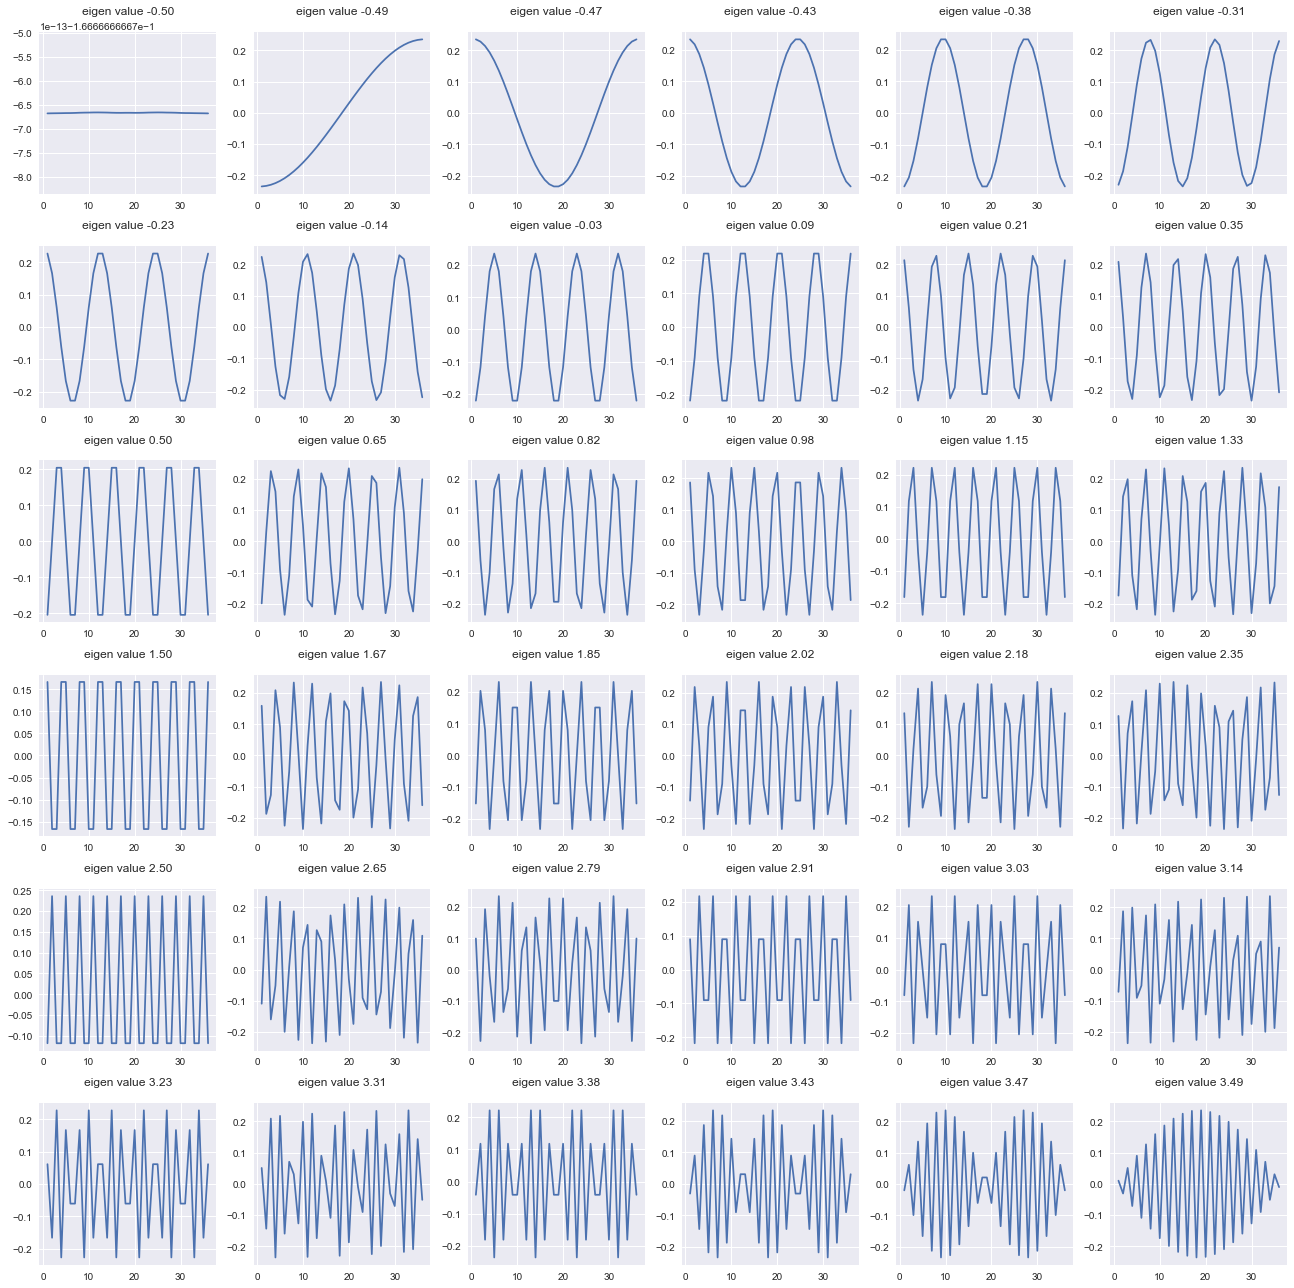

In [8]:
# I decided to use N = 36 for this problem, as it makes the plot below look nicer.
N = 36
w = 1
k = 2
m = 1
c2 = w**2 / (k/m)

A = np.zeros((N, N))

# Construct the matrix A, fixing the first / last row and column afterwards
for i in range(1, N - 1):
    A[i, i] = 2 - c2
    A[i, i - 1] = -1
    A[i, i + 1] = -1
A[0, 0] = 1 - c2
A[0, 1] = -1
A[N - 1, N - 1] = 1 - c2
A[N - 1, N - 2] = -1

# print("A:\n", A)

eigen_values, eigen_vectors = np.linalg.eigh(A)
print("eigen_values:\n", eigen_values)

rows = int(np.ceil(np.sqrt(N)))
cols = int(np.floor(np.sqrt(N)))

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(3*rows, 3*cols))

x = np.arange(1, N + 1)

i = 0
for row in axs:
    for ax in row:
        if i >= N:
            break
        ax.plot(x, eigen_vectors[:, i])
        ax.set_title(f"eigen value {eigen_values[i]:1.2f}\n")
        i += 1
plt.tight_layout()
plt.show()
        

## Answer

The frequencies increase with mass number.

The first mode has all the frequencies of the masses identical, but then as we cycle through the eigenvalues we see we get situations where the freuencies of each mass are different. The frequencies themselves look to be following a sinusoidal function themselves, or a linear combination of sinusoidal functions.